# 실습 4:Least Squares (2024.10.07)
### 빅데이터수치해석 입문 및 실습
### 숙명여자대학교 기계시스템학부 심주용

- Reference: [Data-Driven Science and Engineering](https://www.databookuw.com/) by Steven L. Brunton, J. Nathan Kutz

##  Least Squares

Let's compare a true linear relationship and noisy data points around that line.


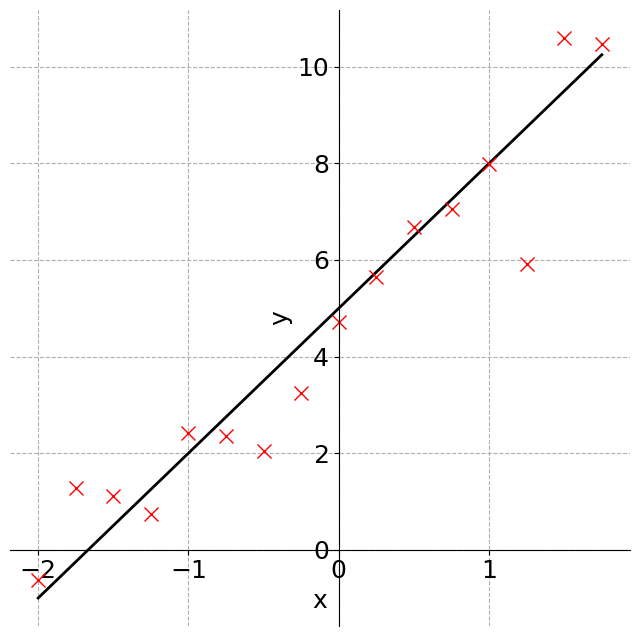

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

a = 3 # True slope
b = 5
x = np.arange(-2,2,0.25)
x = x.reshape(-1, 1)
y = a*x + b + np.random.randn(*x.shape) # Add noise
# y = a*x + np.random.randn(x.shape[0],x.shape[1])

fig, ax = plt.subplots()
ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements
ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')


In [ ]:
x

array([[-2.  ],
       [-1.75],
       [-1.5 ],
       [-1.25],
       [-1.  ],
       [-0.75],
       [-0.5 ],
       [-0.25],
       [ 0.  ],
       [ 0.25],
       [ 0.5 ],
       [ 0.75],
       [ 1.  ],
       [ 1.25],
       [ 1.5 ],
       [ 1.75]])

In [ ]:
A = np.concatenate((x,np.ones(x.shape)),axis=1)
A

array([[-2.  ,  1.  ],
       [-1.75,  1.  ],
       [-1.5 ,  1.  ],
       [-1.25,  1.  ],
       [-1.  ,  1.  ],
       [-0.75,  1.  ],
       [-0.5 ,  1.  ],
       [-0.25,  1.  ],
       [ 0.  ,  1.  ],
       [ 0.25,  1.  ],
       [ 0.5 ,  1.  ],
       [ 0.75,  1.  ],
       [ 1.  ,  1.  ],
       [ 1.25,  1.  ],
       [ 1.5 ,  1.  ],
       [ 1.75,  1.  ]])

In [ ]:
y

array([[-0.63353645],
       [ 1.26901542],
       [ 1.1025294 ],
       [ 0.7474724 ],
       [ 2.41701972],
       [ 2.34467275],
       [ 2.04221878],
       [ 3.25525928],
       [ 4.7158215 ],
       [ 5.64741061],
       [ 6.69096564],
       [ 7.0464662 ],
       [ 7.98563827],
       [ 5.91119832],
       [10.59656022],
       [10.477907  ]])

In [ ]:
A = np.concatenate((np.ones(x.shape), x),axis=1)

U, S, VT = np.linalg.svd(A,full_matrices=False)
b_pred, a_pred = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y # Least-square fit
b_pred, a_pred

(array([4.82337863]), array([2.77871948]))

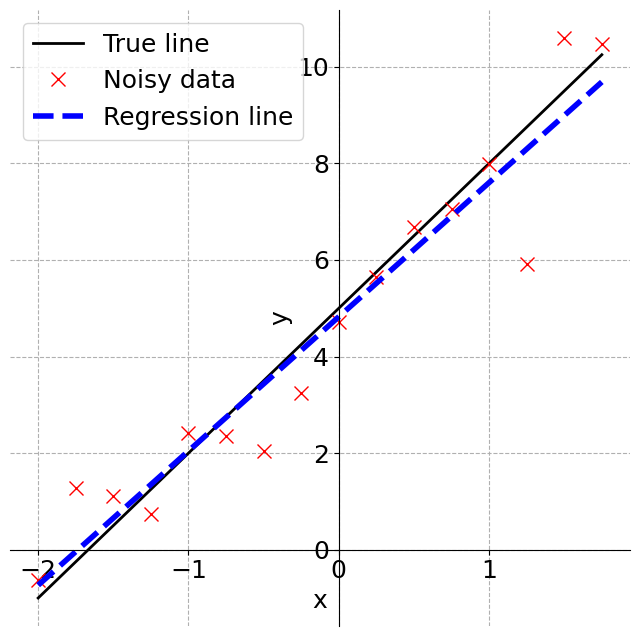

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, a*x+b, color='k', linewidth=2, label='True line') # True relationship
ax.plot(x, y, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

ax.plot(x,a_pred * x + b_pred,'--',color='b',linewidth=4, label='Regression line')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.grid(linestyle='--')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.legend()
plt.show()

In [ ]:
# Methods of computing regression
atilde1 = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ y
atilde2 = np.linalg.pinv(A) @ y

print('pseudo inverse by svd:')
print(atilde1)
print('left pseudo inverse:')
print(atilde2)

pseudo inverse by svd:
[[4.82337863]
 [2.77871948]]
left pseudo inverse:
[[4.82337863]
 [2.77871948]]


## Use scikit learn's Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(A, y)
reg.coef_, reg.intercept_

(array([[0.        , 2.77871948]]), array([4.82337863]))

## 2021년도 기말고사 문제: Least Squares



다음은 그림과 같이 사람을 대상으로 온도의 증가 감소에 따라서 열적 쾌적함의 만족도를 -3부터 +3까지 7개의 스코어 평가하여 매 30초 동안 데이터를 얻었었다. 이때 다양한 센서 데이터와 열적 쾌적함의 정도를 저장한 데이터 ‘Thermal.csv’를 이용하여 아래 문제를 푸세요.
![image.png](https://raw.githubusercontent.com/jooyongsim/numerical2024/refs/heads/main/thermal_comfort_1.png)

위 데이터의 각각의 열의 값은 아래와 같이 RH(상대습도), Tair (공기온도), Tsk1/Tsk2/Tsk3 (피부 각각 위치의 온도) 그리고 PV(열적 쾌적함 점수)이다. ‘_grad’로 표기된 것은 앞서 30초 전의 온도와 차이이다.

![image.png](https://raw.githubusercontent.com/jooyongsim/numerical2024/refs/heads/main/thermal_comfort_2.png)

위 데이터 중 센서값 RH 부터 Tair, Tair_grad, Tsk1, Tsk1_grd, Tsk2, Tsk2_grd, Tsk2, Tsk3_grad까지 9개의 Feature를 이용해서 PV를 예측하는 선형 회귀 모델을 구하여라. 즉 Linear Least Squares 문제를 풀어라.


### 1) PV 예측 선형회귀 모델의 각각의 계수를 구하세요.


In [ ]:
import numpy as np

import urllib.request
url = 'https://github.com/jooyongsim/numerical2023/raw/refs/heads/main/Thermal.csv'
filename = 'Thermal.csv'
urllib.request.urlretrieve(url, filename)

Data = np.loadtxt('Thermal.csv',delimiter=',')
A = Data[:,:9]
Y = Data[:,9]

ones = np.ones((A.shape[0],1))
A = np.concatenate((A,ones),axis=1)

In [ ]:
U, S, VT = np.linalg.svd(A, full_matrices=False)
print('U.shape, S.shape, VT.shape: ', U.shape, S.shape, VT.shape)

pinv = VT.T @ np.linalg.inv(np.diag(S)) @ U.T
coef = pinv @ Y
coef = np.array(coef)

coeff_names = ['constant', 'RH', 'Tair', 'Tair_grad', 'Tsk1', 'Tsk1_grad', 'Tsk2', 'Tsk2_grad', 'Tsk3', 'Tsk3_grad']

for j in range(len(coef)) :
    print(f'coefficient {j+1}, {coeff_names[j]:<10}: {coef[j]:.4f}')


U.shape, S.shape, VT.shape:  (3196, 10) (10,) (10, 10)
coefficient 1, constant  : -0.0071
coefficient 2, RH        : 0.4099
coefficient 3, Tair      : 0.1457
coefficient 4, Tair_grad : -0.4243
coefficient 5, Tsk1      : -0.3199
coefficient 6, Tsk1_grad : 0.1654
coefficient 7, Tsk2      : 0.1878
coefficient 8, Tsk2_grad : 0.2344
coefficient 9, Tsk3      : 0.1378
coefficient 10, Tsk3_grad : -8.8263


### 2) 위 선형 모델의 RMSE를 구하세요.

(array([-7.10450840e-03,  4.09948845e-01,  1.45691671e-01, -4.24339040e-01,
        -3.19930036e-01,  1.65392433e-01,  1.87785078e-01,  2.34392105e-01,
         1.37755914e-01, -8.82628166e+00]),
 1.1557446532073126)

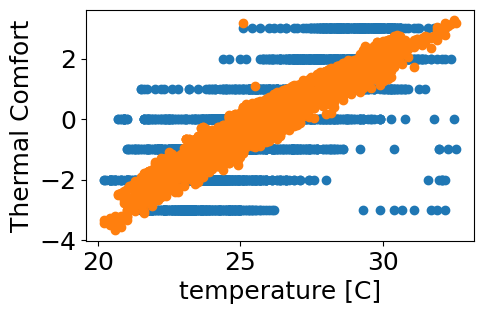

In [ ]:
# constant coefficient를 사용하는 경우
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Thermal.csv', header=None)
X = df.drop(labels=[9], axis=1)
X.head()

y = df.iloc[:,9]

dm = np.concatenate((np.array(X),np.ones(X.shape[0])[:,np.newaxis]),axis=1)
U, s, VT = np.linalg.svd(dm,full_matrices=False)
ce = VT.T@np.linalg.inv(np.diag(s))@U.T@y
plt.figure(figsize=[5,3])
plt.plot(dm[:,1],y,'o')
plt.plot(dm[:,1],dm@ce,'o')
plt.xlabel('temperature [C]')
plt.ylabel('Thermal Comfort')

RMSE = np.sqrt(sum((y-dm@ce)*(y-dm@ce))/len(dm))
ce, RMSE # ce: efficient

### 3) 실제 PV와, 예측된 PV 값에 대한 시간에 따른 그래프를 그리세요.
첫번째 데이터부터 순차적으로 시간 간격은 0.5분 간격

### 2-(3) 답 : 실제 PV와 예측된 PV를 시간에 따라 그린 그래프

Text(0, 0.5, 'thermal comfort')

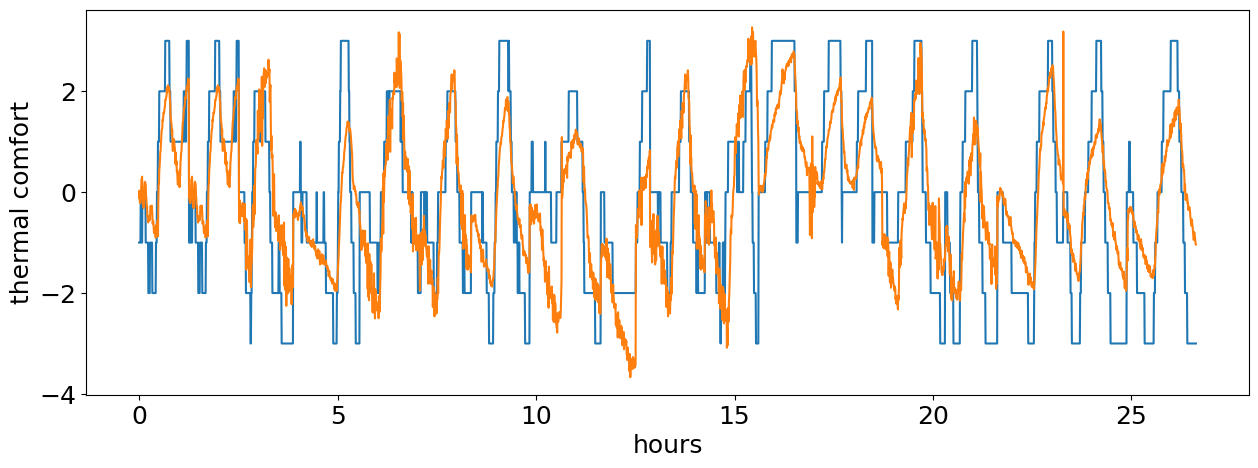

In [ ]:
y_true = y
y_pred = dm@ce
plt.figure(figsize=[15,5])
time = np.arange(0,len(X)/2,0.5)/60
plt.plot(time,y_true)
plt.plot(time,y_pred)
plt.xlabel('hours')
plt.ylabel('thermal comfort')

### 4) Tair만 사용했을 때의 선형 회귀 모델의 RMSE를 구하고 문제 (2)에서 구한 값과 비교하세요.

Text(0, 0.5, 'thermal comfort')

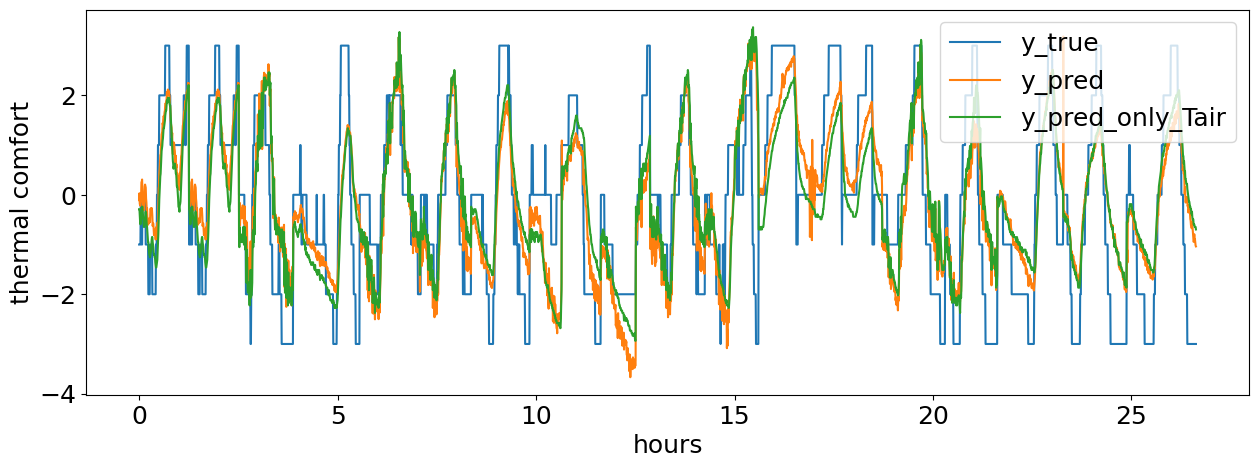

In [ ]:
dm2 = np.concatenate((np.array(X)[:,1:2],np.ones(X.shape[0])[:,np.newaxis]),axis=1)
U2, s2, VT2 = np.linalg.svd(dm2,full_matrices=False)
ce2 = VT2.T@np.linalg.inv(np.diag(s2))@U2.T@y
y_pred2 = dm2@ce2

plt.figure(figsize=[15,5])
time = np.arange(0,len(X)/2,0.5)/60
plt.plot(time,y_true)
plt.plot(time,y_pred)
plt.plot(time,y_pred2)
# plt.plot(time,y_pred2)
plt.legend(('y_true','y_pred','y_pred_only_Tair'))
plt.xlabel('hours')
plt.ylabel('thermal comfort')

#### 문제(4) 정답: Tair Only RMSE: 1.2094 (전부 사용: 1.1925) 보다 크다.

In [ ]:
RMSE = np.sqrt(sum((y_true-y_pred2)**2)/len(dm))
RMSE

1.2094619118168537

### 5)	분류 문제
위 (1)의 모델의 정확도를 %로 구하여라. 이때 쾌적성 구간을 [-∞,-1.5], (-1.5, +1.5), [+1.5, +∞]의 세개의 구간으로 나누어 정확도를 평가한다. 예를 들어 실제값이 -3인데 -2로 예측한 경우는 맞다고 평가하고, 실제 -3인데 -1.4로 예측한 경우는 틀렸다고 보아 전체 데이터 중 맞은 예측의 수를 정확도(%)로 나타내세요.

### 정답: 79.47%

In [ ]:
y_true.shape

(3196,)

In [ ]:
pred_ds = np.zeros(y_true.shape)
pred_ds[y_pred<=-1.5] = -1
pred_ds[y_pred>-1.5] = +1

y_true_ds = np.zeros(y_true.shape)
y_true_ds[y_true<=-1.5] = -1
y_true_ds[y_true>-1.5] = +1
sum(pred_ds == y_true_ds)/len(y_true)

0.7947434292866082

## 2021년도 기말고사 문제: Principal Component Analysis
위 2번 문제의 데이터를 이용해서 PCA를 수행하세요.



### 1)PCA 시각화

위 데이터에서 PV를 PC1 vs PC2 좌표계에서 scatter plot을 그리세요. 이때 PV를 [-3, -2], [-1, +1], [+1, 2] 세구간을 나누어서 다른 색으로 대해 그리세요.마찬가지 그래프를 PC3과 PC4에 대해서 그리세요.

Text(0, 0.5, 'pc2')

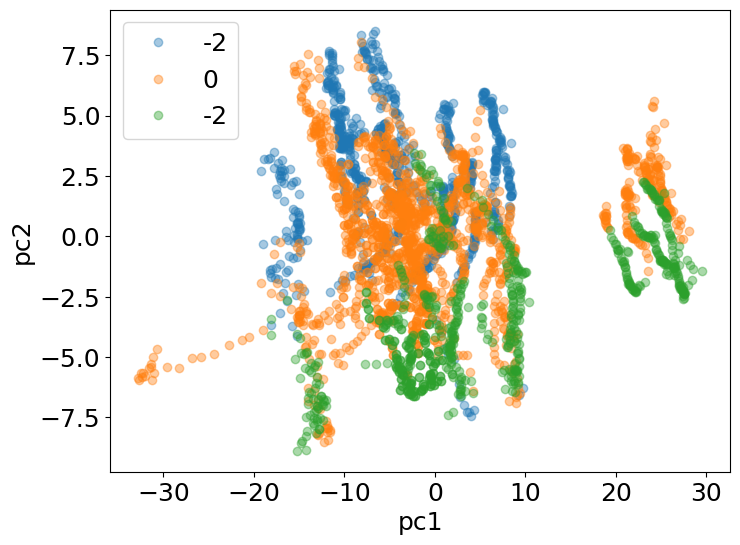

In [ ]:
xin = np.array(X)
xm = (xin-xin.mean(axis=0))
u, s, vt = np.linalg.svd(xm, full_matrices=False)
pcs = xm@vt.T

sel1 = y_true < -1.5
sel2= np.logical_and(y_true > -1.5,y_true < 1.5)
sel3= y_true >= 1.5
plt.figure(figsize=[8,6])
plt.plot(pcs[:,0][sel1],pcs[:,1][sel1],'o', alpha=0.4)
plt.plot(pcs[:,0][sel2],pcs[:,1][sel2],'o', alpha=0.4)
plt.plot(pcs[:,0][sel3],pcs[:,1][sel3],'o', alpha=0.4)
plt.legend(('-2','0','-2'))
plt.xlabel('pc1')
plt.ylabel('pc2')

(-4.0, 4.0)

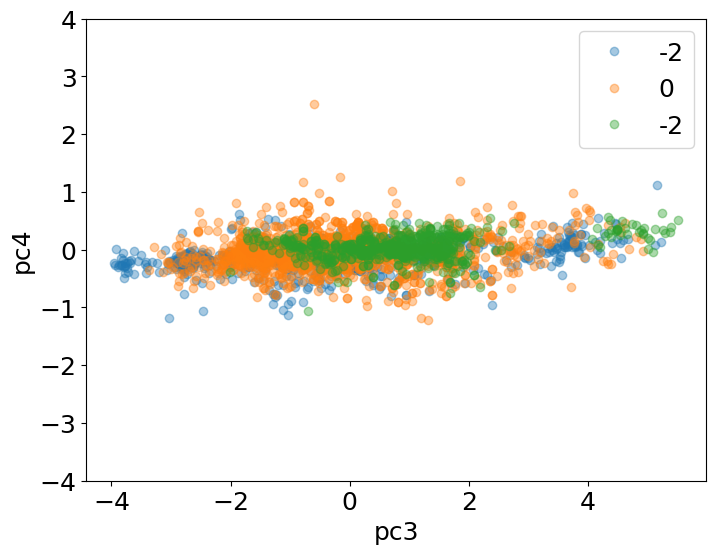

In [ ]:
xin = np.array(X)
xm = (xin-xin.mean(axis=0))
u, s, vt = np.linalg.svd(xm, full_matrices=False)
pcs = xm@vt.T

sel1 = y_true < -1.5
sel2= np.logical_and(y_true > -1.5,y_true < 1.5)
sel3= y_true >= 1.5
plt.figure(figsize=[8,6])
plt.plot(pcs[:,2][sel1],pcs[:,3][sel1],'o', alpha=0.4)
plt.plot(pcs[:,2][sel2],pcs[:,3][sel2],'o', alpha=0.4)
plt.plot(pcs[:,2][sel3],pcs[:,3][sel3],'o', alpha=0.4)
plt.legend(('-2','0','-2'))
plt.xlabel('pc3')
plt.ylabel('pc4')
plt.ylim([-4, 4])

### 2) 주성분 분석 정석적 평가
위에서 획득한 주성분 중에서 일부는 유용한 특징으로 나머지는 노이즈로 분류한다면 어떤 주성분(PC; Principal Components)을 유의미한 데이터, 어떤 주성분은 노이즈로 분류하겠는가?

### 정답: PC (1~3)까지 유의미한 데이터로 사용하고 PC (4)부터는 노이즈로 분류한다.

### 3) PCA 시각화: 두개 Class로 시각화
[-3, 0], (0, +3] 세구간을 나누어서 다른 색으로 scatter plot을 PC1 vs PC2에 대해 그리세요.

Text(0, 0.5, 'pc2')

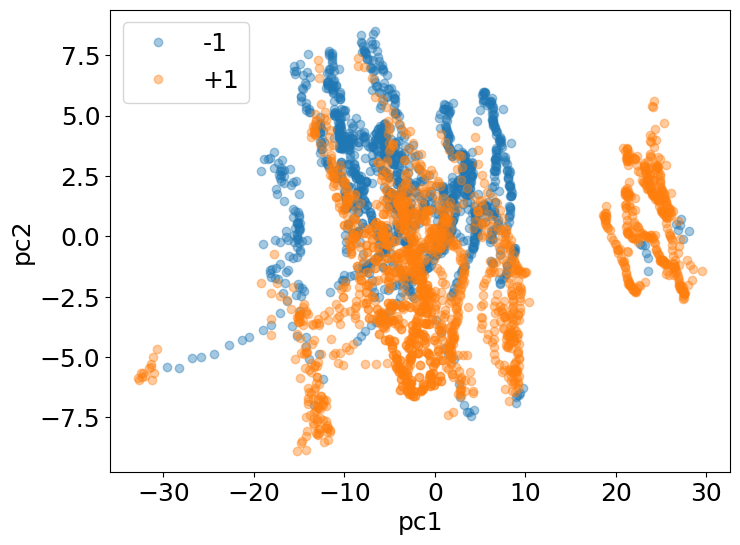

In [ ]:
sel1 = y_true < 0
# sel2= np.logical_and(y_true > -1.5,y_true < 1.5)
sel3= y_true >= 0
plt.figure(figsize=[8,6])
plt.plot(pcs[:,0][sel1],pcs[:,1][sel1],'o', alpha=0.4)
# plt.plot(pcs[:,0][sel2],pcs[:,1][sel2],'o', alpha=0.4)
plt.plot(pcs[:,0][sel3],pcs[:,1][sel3],'o', alpha=0.4)
# plt.legend(('0','+1','-1'))
plt.legend(('-1','+1'))
plt.xlabel('pc1')
plt.ylabel('pc2')


### 4) 분류하기 예:
주성분 PC2 = 0을 기준으로 더움(0, +3]과 추움[-3, 0] 두 구간으로 나누어 구별한다고 할 때 더움과 추움을 구별하는 정확도는 무엇인가?
## 정답: 75.4%

In [ ]:
pred = np.where(pcs[:,1]>0,'Cold', 'Hot')
gt = np.where(y_true<=0,'Cold', 'Hot')
sum(pred == gt)/gt.size

0.7543804755944932

In [ ]:
pred = np.where(pcs[:,1]>0,'Cold', 'Hot')
pred, gt, gt.shape

(array(['Cold', 'Cold', 'Cold', ..., 'Cold', 'Cold', 'Cold'], dtype='<U4'),
 array(['Cold', 'Cold', 'Cold', ..., 'Cold', 'Cold', 'Cold'], dtype='<U4'),
 (3196,))

### 5) Total Variance Explained
위에서 전체 데이터 몇 번째 Rank-r SVD Approximation을 했을 때 전체 데이터의 95%이상의 Variance를 유지할 수 있는 지 구하세요.

### 정답:  Rank-r (r=1) SVD Approximation일 때 95%이상의 Explained Variance를 가진다.

In [ ]:
U, S, VT = np.linalg.svd(Data,full_matrices=False)

s_cumsums_2 = np.cumsum(S**2)
s_sum_2 = np.sum(S**2)
criteria = s_cumsums_2/s_sum_2 >=0.95
n = s_cumsums_2.shape[0]
np.arange(1,n+1)[criteria].min()

1

## 2021년도 기말고사 문제: Total Least Squares & Singular Value Decomposition
“camera_cal_matrix.csv” 파일의 Matrix $A ∈R^{58x9}$를 Design Matrix로 하는 다음 식 $Ay=0$을 만족하는 $y$ ($y \in{R^9}$)를 찾고자 한다.

이때, $0 \in{R^9}$이고 $\Vert y \Vert_2 =1$. 위를 만족시키는 $y$가 존재하지 않는 다면 $Ay$ 를 $0$에 가장 가깝게 하는 $y$를 찾아라.
- $Ay$의 Norm을 최소화하는 $y$ 를 구한다.
- $A = U \Sigma V^T$ 일때 $\Vert V y \Vert_2 =\Vert V^T y \Vert_2 = \Vert y \Vert_2$ 임을 이용한다.


In [ ]:
url = 'https://github.com/jooyongsim/numerical2024/raw/refs/heads/main/camera_cal_matrix.csv'
filename = 'camera_cal_matrix.csv'
urllib.request.urlretrieve(url, filename)

Mat = np.loadtxt('camera_cal_matrix.csv',delimiter=',')
U, s, VT = np.linalg.svd(Mat)
V = VT.T
V[:,-1] # last column

array([-9.27961357e-03,  1.08161653e-03, -7.46403176e-01,  6.57152422e-04,
       -6.95754263e-03, -6.65391493e-01, -8.44261854e-08,  9.48121756e-07,
       -5.83019062e-04])

In [ ]:
sum(abs(Mat@V[:,-1])) # -> 거이 0에 가까운걸 알수 있다.

0.07413183863359965

In [ ]:
sum(abs(Mat@V[:,0])) # -> 상대적으로 엄청 큰것을 알수 있다.

6053316.878534164

# Root of Equation: Newton's Method

> Equation: $x - 2sin(x) = 0$


In [ ]:
import numpy as np

def func(x):
    return x**2-2

def func_p(x):
    return 2*x

N = 10; x0 = 2; tol = 1e-3; xn = x0
for i in range(N):
    xnn = xn - func(xn)/func_p(xn)
    error = (xnn - xn)/xnn
    print(f'n:{i}, xn:{xn:.6f}, xn+1:{xnn:.6f}, error:{error:.6e}')
    xn = xnn
    if abs(error) < tol:
        break

print(f'Solution of x-2sin(x)=0 is {xn:.6f}')

n:0, xn:2.000000, xn+1:1.500000, error:-3.333333e-01
n:1, xn:1.500000, xn+1:1.416667, error:-5.882353e-02
n:2, xn:1.416667, xn+1:1.414216, error:-1.733102e-03
n:3, xn:1.414216, xn+1:1.414214, error:-1.501824e-06
Solution of x-2sin(x)=0 is 1.414214


## Eigen Values, Eigen Vectors, Inverse Matrix

In [ ]:
import numpy as np

np.array([1,2,3,4])

array([1, 2, 3, 4])

In [ ]:
M = np.array([1,2,3,4]).reshape(2,2)
M

array([[1, 2],
       [3, 4]])

In [ ]:
M_inv = np.linalg.inv(M)
M_inv

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [ ]:
iden = np.matmul(M,M_inv)
iden


array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

In [ ]:
np.round(iden,5)

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.round(M@M_inv,5)

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.round(M_inv@M,5)

array([[1., 0.],
       [0., 1.]])

In [ ]:
np.linalg.eig(M)

EigResult(eigenvalues=array([-0.37228132,  5.37228132]), eigenvectors=array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))

In [ ]:
A = [7.3, 0.2, -3.7, -11.5, 1, 5.5, 17.7, 1.8, -9.3]
A = np.array(A).reshape((3,3))
A

array([[  7.3,   0.2,  -3.7],
       [-11.5,   1. ,   5.5],
       [ 17.7,   1.8,  -9.3]])

In [ ]:
eig, X = np.linalg.eig(A)
np.round(eig,5), np.round(X,5)

(array([-4., -0.,  3.]),
 array([[-0.30151,  0.43644, -0.30151],
        [ 0.30151,  0.21822,  0.90453],
        [-0.90453,  0.87287, -0.30151]]))

In [ ]:
#D = X_inv*A*X
X_inv = np.linalg.inv(X)
X_inv

array([[ 4.31161223,  0.66332496, -2.32163735],
       [ 3.66606056,  0.91651514, -0.91651514],
       [-2.32163735,  0.66332496,  0.99498744]])

In [ ]:
np.round(X_inv@A@X,5)

array([[-4.,  0., -0.],
       [-0.,  0., -0.],
       [-0.,  0.,  3.]])

# Plotly Turials & Examples

In [ ]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 size='petal_length', hover_data=['petal_width'])
fig.show()

In [ ]:
import plotly.express as px
import numpy as np

t = np.linspace(0, 2*np.pi, 100)

fig = px.line(x=t, y=np.cos(t), labels={'x':'t', 'y':'cos(t)'})
fig.show()